<a href="https://colab.research.google.com/github/vunky-himawan/PCVK/blob/main/Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

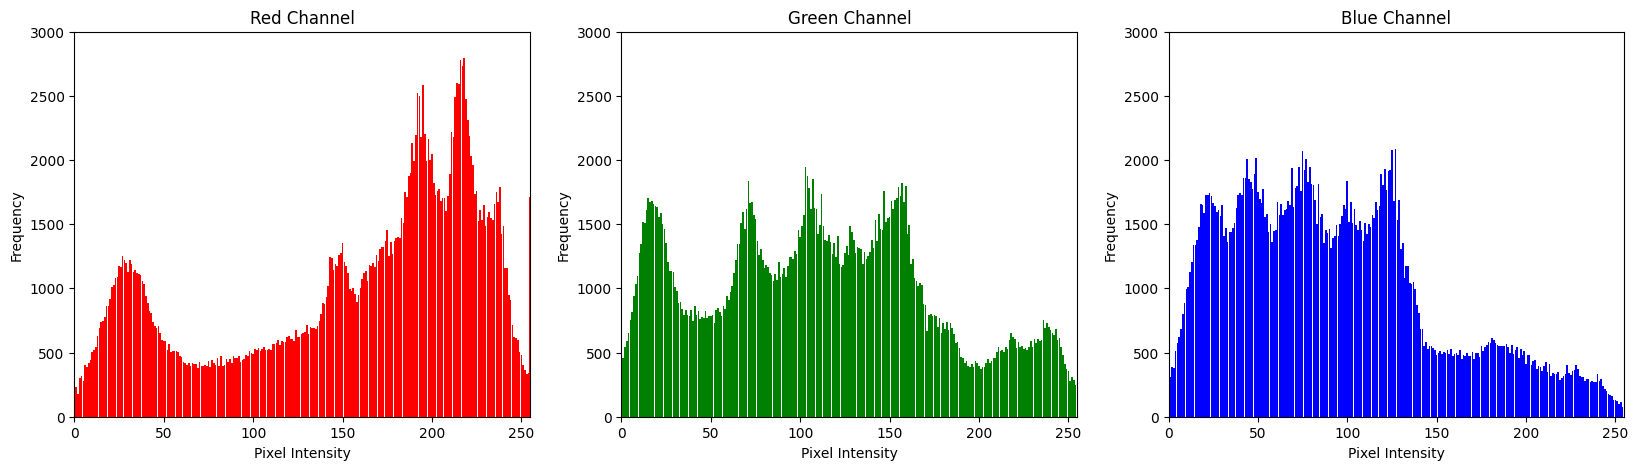

In [3]:
image = io.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/lena.jpg')

hist_r = [0] * 256
hist_g = [0] * 256
hist_b = [0] * 256

for row in image:
  for pixel in row:
    r, g, b = pixel
    hist_r[r] += 1
    hist_g[g] += 1
    hist_b[b] += 1

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.bar(range(256), hist_r, color='red', width=0.9)
plt.ylim([0, 3000])
plt.xlim([0, 255])
plt.title('Red Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.bar(range(256), hist_g, color='green', width=0.9)
plt.ylim([0, 3000])
plt.xlim([0, 255])
plt.title('Green Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.bar(range(256), hist_b, color='blue', width=0.9)
plt.ylim([0, 3000])
plt.xlim([0, 255])
plt.title('Blue Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

In [4]:
hist_red, _ = np.histogram(image[:, :, 0], bins=256, range=(0, 256))
hist_green, _ = np.histogram(image[:, :, 1], bins=256, range=(0, 256))
hist_blue, _ = np.histogram(image[:, :, 2], bins=256, range=(0, 256))

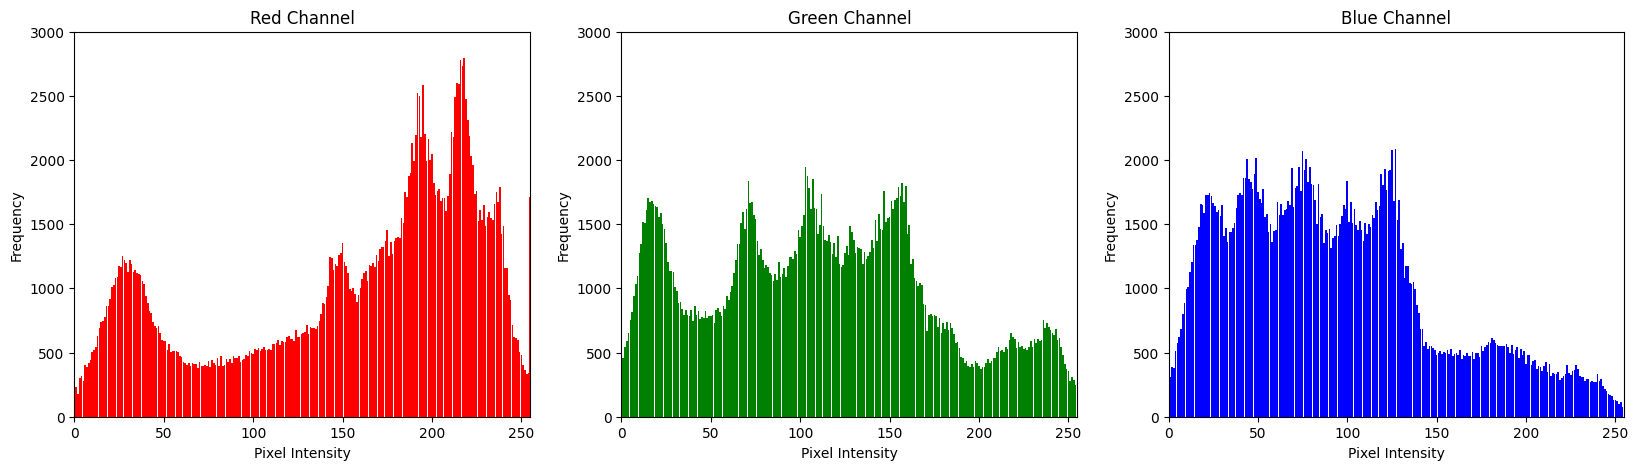

In [5]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.bar(range(256), hist_red, color='red', width=0.9)
plt.ylim([0, 3000])
plt.xlim([0, 255])
plt.title('Red Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.bar(range(256), hist_green, color='green', width=0.9)
plt.ylim([0, 3000])
plt.xlim([0, 255])
plt.title('Green Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.bar(range(256), hist_blue, color='blue', width=0.9)
plt.ylim([0, 3000])
plt.xlim([0, 255])
plt.title('Blue Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [6]:
# Fungsi untuk menghitung histogram
def compute_histogram(channel, bins=256):
  hist_list = np.zeros(bins, dtype=int)

  for i in range(channel.shape[0]):
    for j in range(channel.shape[1]):
      hist_list[channel[i, j]] += 1

  return hist_list

In [7]:
# Fungsi untuk menghitung histogram equalization
def histeq(hist, bins=256):
    new_colors = np.zeros(bins, dtype=np.int32)
    cumulatives = np.zeros(bins, dtype=np.float64)

    probabilities = hist / np.sum(hist)

    cumulative = 0
    for i in range(bins):
        cumulative += probabilities[i]
        cumulatives[i] = cumulative

    for i in range(bins):
        new_colors[i] = np.floor((bins - 1) * cumulatives[i]).astype(np.uint8)

    return new_colors

In [8]:
# Fungsi untuk menerapkan histogram equalization
def apply_hist_equalization(image, combined_hist=True):
    # Hitung histogram untuk setiap kanal warna
    hist_red = compute_histogram(image[:, :, 0])
    hist_green = compute_histogram(image[:, :, 1])
    hist_blue = compute_histogram(image[:, :, 2])

    equalized_image = np.zeros_like(image)

    # Menggabungkan histogram
    if combined_hist:
      hist_combined = hist_red + hist_green + hist_blue

      # menghitung hitogram equalization
      new_color = histeq(hist_combined)

      # mengganti warna lama dengan warna baru
      for i in range(equalized_image.shape[0]):
          for j in range(equalized_image.shape[1]):
              equalized_image[i, j] = new_color[image[i, j]]

      return equalized_image

    new_red_color = histeq(hist_red)
    new_green_color = histeq(hist_green)
    new_blue_color = histeq(hist_blue)

    for i in range(equalized_image.shape[0]):
      for j in range(equalized_image.shape[1]):
        equalized_image[i, j, 0] = new_red_color[image[i, j, 0]]
        equalized_image[i, j, 1] = new_green_color[image[i, j, 1]]
        equalized_image[i, j, 2] = new_blue_color[image[i, j, 2]]

    return equalized_image

(-0.5, 1023.5, 511.5, -0.5)

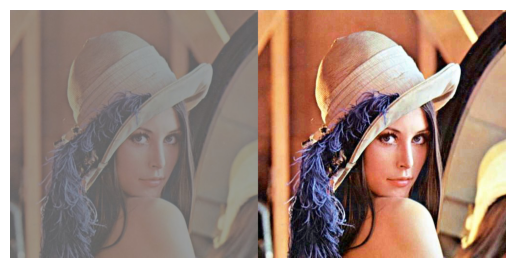

In [9]:
lena_lc = io.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/lena_lc.jpg')

equalized_img = apply_hist_equalization(lena_lc)

new_hist_r = compute_histogram(equalized_img[:, :, 0])
new_hist_g = compute_histogram(equalized_img[:, :, 1])
new_hist_b = compute_histogram(equalized_img[:, :, 2])

final_frame = cv.hconcat([lena_lc, equalized_img])

plt.imshow(final_frame)
plt.axis('off')

In [10]:
def plot_histograms(original_channels, equalized_channels):
    colors = ['red', 'green', 'blue']
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle('Histogram RGB plot')

    for i, color in enumerate(colors):
        # Plot histogram original
        orig_hist = compute_histogram(original_channels[:, :, i])
        axes[0, i].bar(range(256), orig_hist, color=color)
        axes[0, i].set_xlim([0, 256])
        axes[0, i].set_ylim([0, 11000])
        axes[0, i].set_title(f'{color.capitalize()} channel - Original')
        axes[0, i].set_ylabel('Jumlah Piksel')

        # Plot histogram equalized
        eq_hist = compute_histogram(equalized_channels[:, :, i])
        axes[1, i].bar(range(256), eq_hist, color=color)
        axes[1, i].set_xlim([0, 256])
        axes[1, i].set_ylim([0, 11000])
        axes[1, i].set_title(f'{color.capitalize()} channel - Equalized')
        axes[1, i].set_xlabel('Intensitas Warna')
        axes[1, i].set_ylabel('Jumlah Piksel')

    plt.tight_layout()
    plt.show()

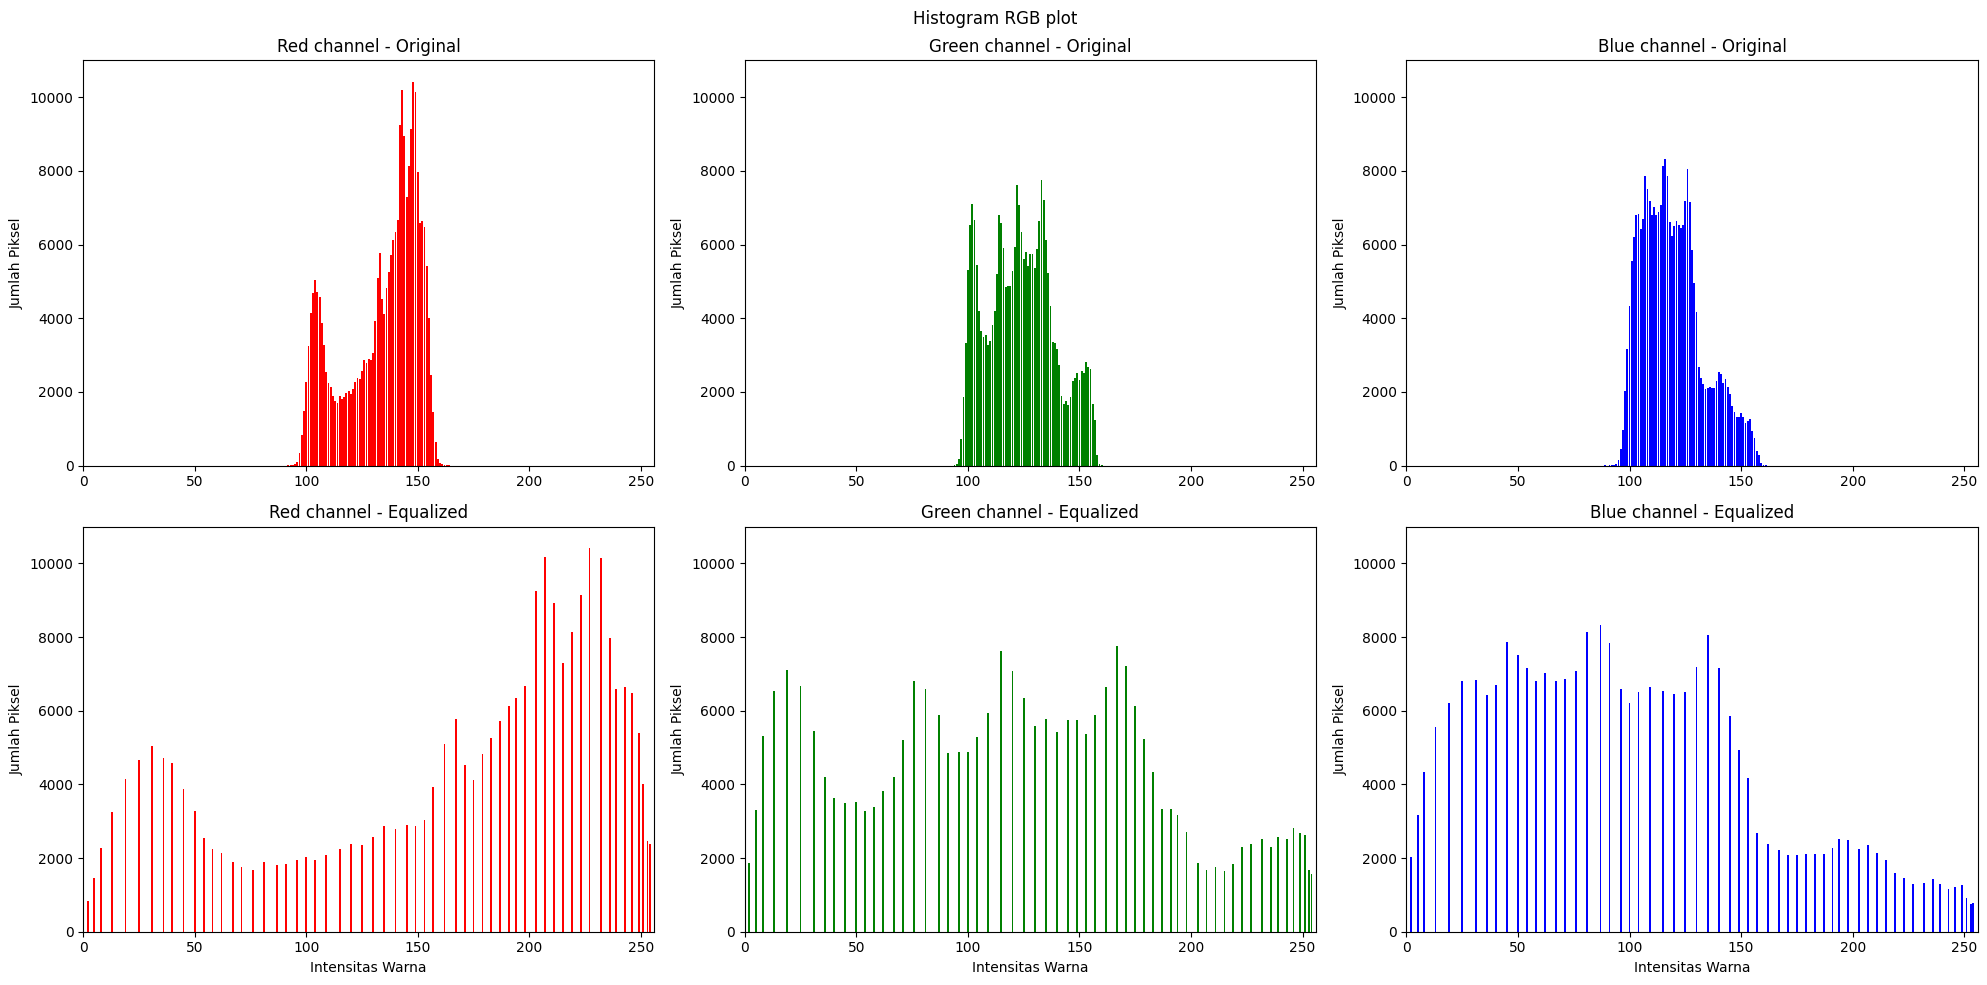

In [11]:
plot_histograms(lena_lc, equalized_img)

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

Text(0.5, 1.0, 'Lenna Histogram Equalization')

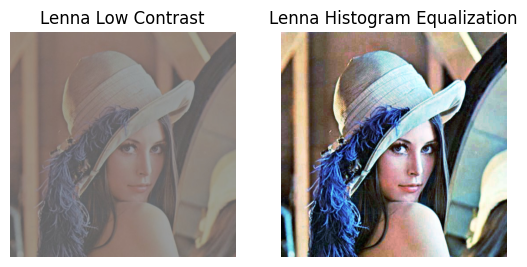

In [12]:
r, g, b = cv.split(lena_lc)

hist_r = cv.equalizeHist(r)
hist_g = cv.equalizeHist(g)
hist_b = cv.equalizeHist(b)

lena_histeq = cv.merge((hist_r, hist_g, hist_b))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(lena_lc)
plt.title("Lenna Low Contrast")

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(lena_histeq)
plt.title("Lenna Histogram Equalization")

In [13]:
combined_hist = new_hist_r + new_hist_g + new_hist_r

print("Penggabungan Histogram: ", combined_hist)
print("Histogram Red: ", new_hist_r)
print("Histogram Green: ", new_hist_g)
print("Histogram Blue: ", new_hist_b)

Penggabungan Histogram:  [ 1853     0  3525     0     0  6252     0     0  9840     0     0     0
     0 13010     0     0     0     0     0 15390     0     0     0     0
     0 16022     0     0     0     0     0 15519     0     0     0     0
 13629     0     0     0 12785     0     0     0     0 11223     0     0
     0     0 10089     0     0     0  8362     0     0     0  7856     0
     0     0  8086     0     0     0     0  7966     0     0     0  8709
     0     0     0     0 10174     0     0     0     0 10369     0     0
     0     0     0  9514     0     0     0  8543     0     0     0     0
  8789     0     0     0  8936     0     0     0  9163     0     0     0
     0 10099     0     0     0     0     0 12132     0     0     0     0
 11835     0     0     0     0 11024     0     0     0     0 10751     0
     0     0     0 11538     0     0     0     0 10994     0     0     0
     0 11545     0     0     0 11470     0     0     0 11466     0     0
     0 13715     0     0  

(-0.5, 1023.5, 511.5, -0.5)

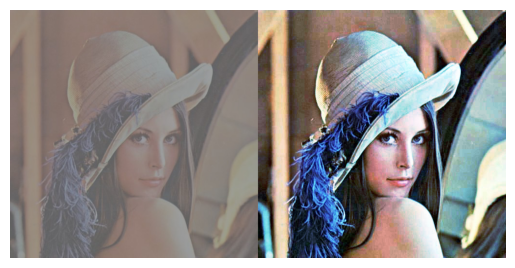

In [14]:
lena_lc = io.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/lena_lc.jpg')

equalized_img = apply_hist_equalization(lena_lc, False)

final_frame = cv.hconcat([lena_lc, equalized_img])

plt.imshow(final_frame)
plt.axis('off')

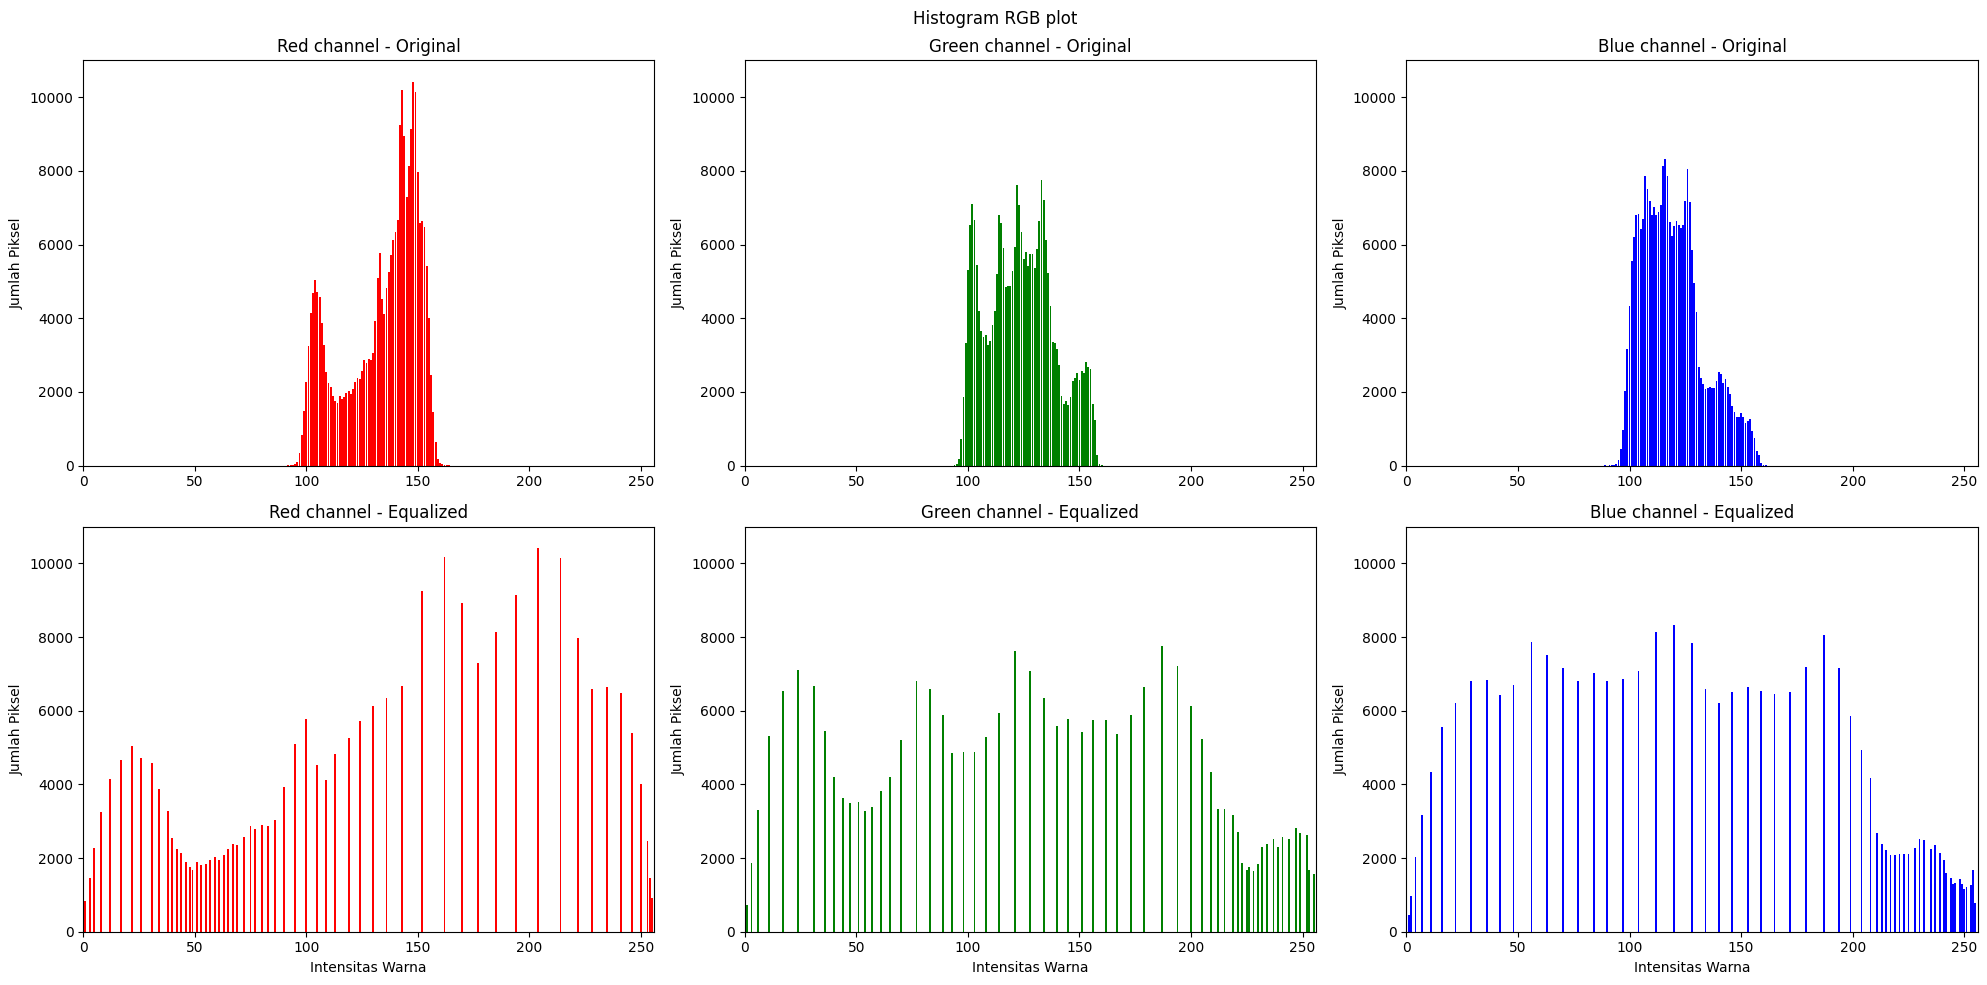

In [15]:
plot_histograms(lena_lc, lena_histeq)

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

In [16]:
# Fungsi untuk menghitung jarak Euclidean antara dua warna
def euclidean_distance(color1, color2):
    return np.sqrt(np.sum((np.array(color1) - np.array(color2)) ** 2))

In [17]:
# Fungsi untuk mencari warna terdekat
def get_nearest_distance(color):
  basic_colors = {
    "black": (0, 0, 0),
    "green": (0, 255, 0),
    "yellow": (255, 255, 0),
    "blue": (0, 0, 255),
    "cyan": (0, 255, 255),
    "magenta": (255, 0, 255),
    "white": (255, 255, 255),
    "red": (255, 0, 0)
  }

  min_distance = float('inf')
  nearest_color = None
  for basic_color in basic_colors.values():
    distance = euclidean_distance(color, basic_color)
    if distance < min_distance:
      min_distance = distance
      nearest_color = basic_color

  return nearest_color

In [18]:
# Fungsi untuk memetakan warna RGB ke warna dasar terdekat
def map_color_to_basic(image):
  new_image = image.copy()

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      new_image[i, j] = get_nearest_distance(image[i, j])

  return new_image

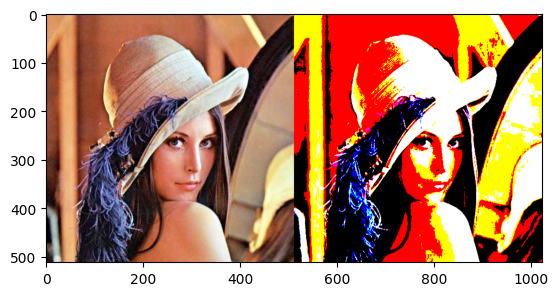

In [19]:
lena = io.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/lena.jpg')

# Peta setiap piksel ke warna dasar terdekat
mapped_color = map_color_to_basic(lena)

final_frame = cv.hconcat([lena, mapped_color])

# Tampilkan gambar hasil pemetaan menggunakan cv2_imshow
plt.imshow(final_frame)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

In [20]:
def threshold(value):
  np.clip(value, 0, 255, out=value)
  return value

In [21]:
def dithering_floyd_and_steinberg(image, distance=1):
  height, width, _ = image.shape

  new_image = image.copy()

  for y in range(height - 1):
    for x in range(1, width - 1):
      old_pixel = new_image[y, x].copy()
      jarakPixel = distance

      #menghitung pixel baru berdasar jarak dan juga batasan warna yang dimiliki
      new_pixel = np.round(jarakPixel * old_pixel / 255.0) * (255 / jarakPixel)
      new_image[y, x] = new_pixel

      #Menghitung kuantitasi error untuk masuk rumus
      error = old_pixel - new_pixel

      #Implementasi rumus dithering Floyd and Steinberg (R1-R4
      new_image[y, x + 1] = threshold(new_image[y, x + 1] + error * 7/16)
      new_image[y + 1, x - 1] = threshold(new_image[y + 1, x - 1] + error * 3/16)
      new_image[y + 1, x] = threshold(new_image[y + 1, x] + error * 5/16)
      new_image[y + 1, x + 1] = threshold(new_image[y + 1, x + 1] + error * 1/16)

  return new_image

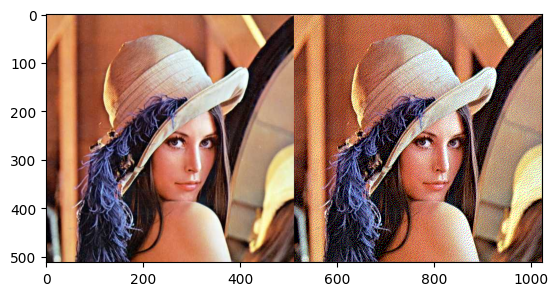

In [22]:
lena = io.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/lena.jpg')

dithered_image = dithering_floyd_and_steinberg(lena)

final_frame = cv.hconcat([lena, dithered_image])

plt.imshow(final_frame)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg

In [23]:
def grayscale_convert(image):
  grayscale_avg = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
      for x in range(image.shape[1]):
        red = image[y, x, 0]
        green = image[y, x, 1]
        blue = image[y, x, 2]
        grayscale_avg[y, x] = np.mean([red, green, blue])

  return grayscale_avg

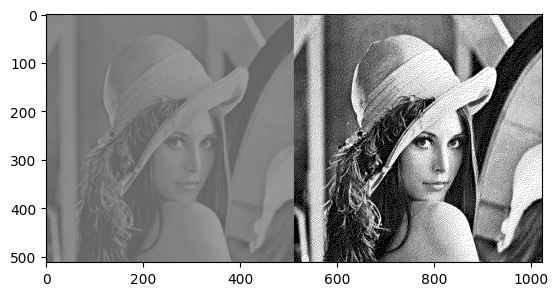

In [24]:
# Gambar original
lena_lc = io.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/lena_lc.jpg')

# Mengubah ke grayscale
gray_lena_lc = grayscale_convert(lena_lc)

# Melakukan histogram equalization
hist_eq = apply_hist_equalization(gray_lena_lc)

# Melakukan dithering image
dithered_image = dithering_floyd_and_steinberg(hist_eq)

final_frame = cv.hconcat([gray_lena_lc, dithered_image])

plt.imshow(final_frame)

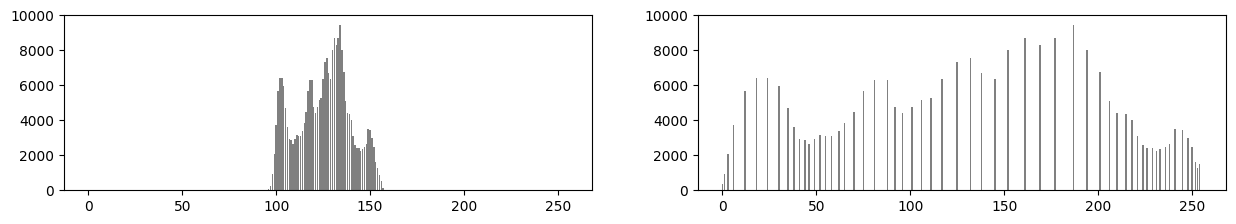

In [25]:
images = np.array([gray_lena_lc, hist_eq])

plt.figure(figsize=(15, 5))

for i, image in enumerate(images):
    plt.subplot(2, 2, i+1)
    plt.bar(range(256), compute_histogram(image[:,:,0]), color='gray')
    plt.ylim([0, 10000])

plt.show()